In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("F:\\IMDb Data\\Kaggle350\\AllMoviesDetailsCleaned.csv", sep=";", 
                 parse_dates=["release_date"])
print(df.columns)
df = df[["id","title","budget","genres","popularity","revenue","release_date"]] 
df = df.dropna(axis=0,how="any")
df = df[df.genres.str.contains("Crime|Romance")]
print(df.shape)
df.head()

C:\Users\amir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['id', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'production_companies_number',
       'production_countries_number', 'spoken_languages_number'],
      dtype='object')
(32071, 7)


,id,title,budget,genres,popularity,revenue,release_date
0,2,Ariel,0,Drama|Crime,0.823904,0,1988-10-21
2,5,Four Rooms,4000000,Crime|Comedy,1.698,4300000,1995-12-25
3,6,Judgment Night,0,Action|Thriller|Crime,1.32287,12136938,1993-10-15
8,13,Forrest Gump,55000000,Comedy|Drama|Romance,10.351236,677945399,1994-06-07
11,16,Dancer in the Dark,12800000,Drama|Crime|Music,2.106217,40031879,2000-05-17


In [2]:
df["popularity"] = pd.to_numeric(df['popularity'], errors='coerce')
df['release_date']= pd.to_datetime(df.release_date)
df['year']= df.release_date.dt.year
df['month']= df.release_date.dt.month
df.head()

,id,title,budget,genres,popularity,revenue,release_date,year,month
0,2,Ariel,0,Drama|Crime,0.823904,0,1988-10-21,1988,10
2,5,Four Rooms,4000000,Crime|Comedy,1.698000,4300000,1995-12-25,1995,12
3,6,Judgment Night,0,Action|Thriller|Crime,1.322870,12136938,1993-10-15,1993,10
8,13,Forrest Gump,55000000,Comedy|Drama|Romance,10.351236,677945399,1994-06-07,1994,6
11,16,Dancer in the Dark,12800000,Drama|Crime|Music,2.106217,40031879,2000-05-17,2000,5


In [4]:
df["type"] = pd.np.where(df.genres.str.contains("Crime"),"Crime",
             pd.np.where(df.genres.str.contains("Romance"),"Romance","Other"))

df.head()

,id,title,budget,genres,popularity,revenue,release_date,year,month,type
0,2,Ariel,0,Drama|Crime,0.823904,0,1988-10-21,1988,10,Crime
2,5,Four Rooms,4000000,Crime|Comedy,1.698000,4300000,1995-12-25,1995,12,Crime
3,6,Judgment Night,0,Action|Thriller|Crime,1.322870,12136938,1993-10-15,1993,10,Crime
8,13,Forrest Gump,55000000,Comedy|Drama|Romance,10.351236,677945399,1994-06-07,1994,6,Romance
11,16,Dancer in the Dark,12800000,Drama|Crime|Music,2.106217,40031879,2000-05-17,2000,5,Crime


In [5]:
df = df[(df.year < 2018)]

In [6]:
data = pd.DataFrame(df.groupby(["year","type"], sort=True)['popularity'].mean()).reset_index()
# data.head()
df1 = df[df.revenue !=0]
df1["revenue"] = df1["revenue"]/1000000
# df1.head()
data1= pd.DataFrame(df1.groupby(["year","type"],sort=True)['revenue'].mean()).reset_index()
# data1
df2= df[df.budget !=0] 
df2["budget"] = df2["budget"]/1000000 
data2=pd.DataFrame(df2.groupby(["year","type"],sort=True)['budget'].mean()).reset_index()
# data2
data3= pd.DataFrame(df.groupby(["year","type"],sort=True)['id'].count()).reset_index()
# data3

C:\Users\amir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\amir\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


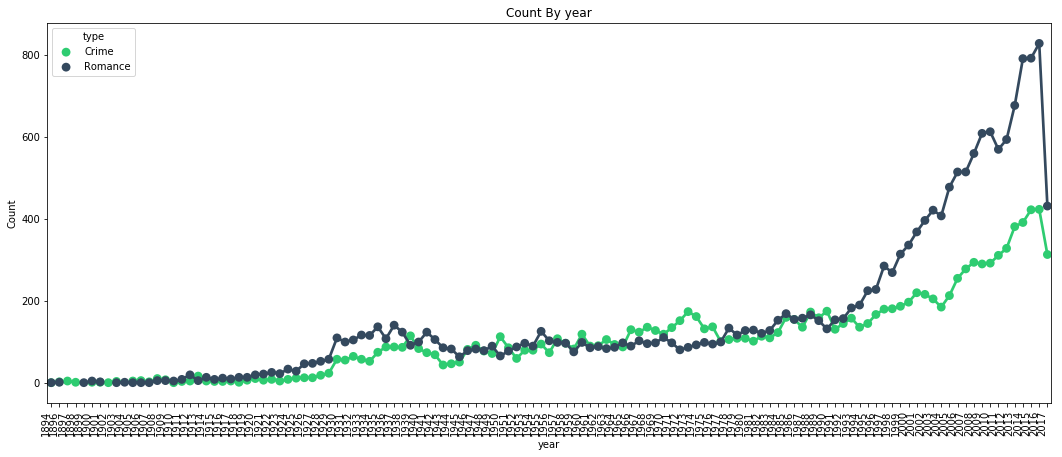

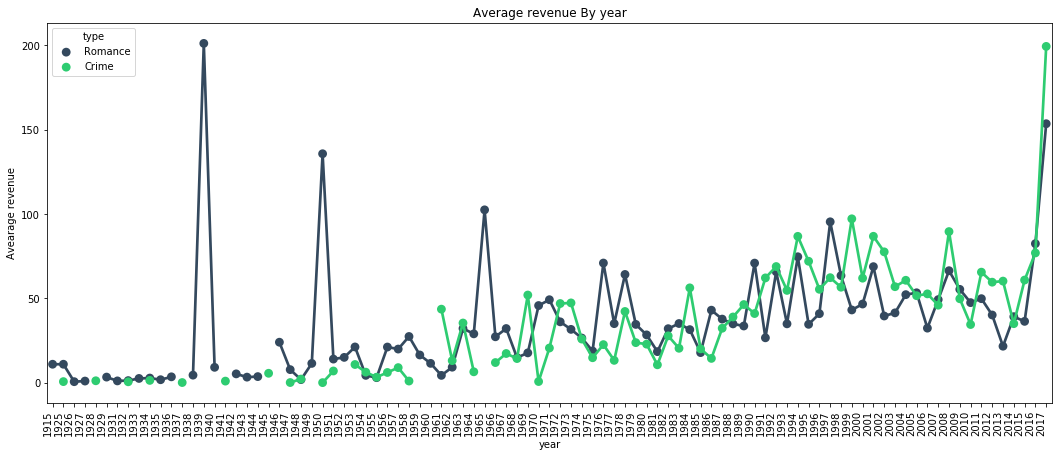

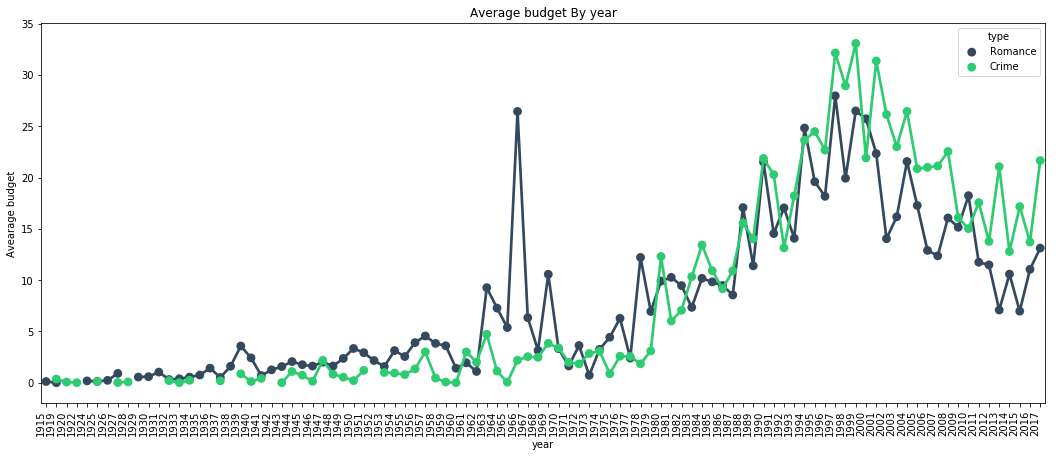

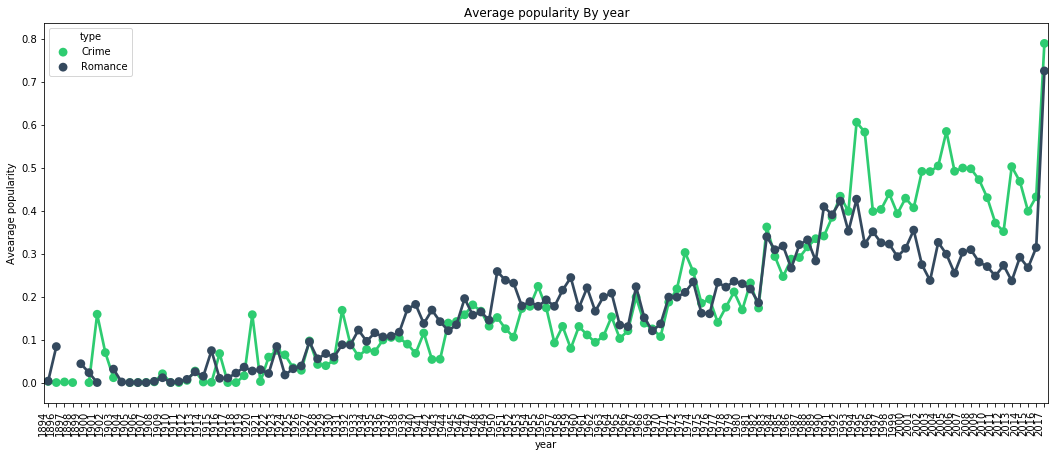

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sns.pointplot(x=data3["year"], y=data3["id"],hue=data3["type"], data=data3,
                join=True, palette={"Crime": "#2ecc71", "Romance": "#34495e"},ax=ax) 
ax.set(xlabel='year', ylabel='Count',title="Count By year")


fig, ax1 = plt.subplots()
fig.set_size_inches(18, 7)

ax1.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sns.pointplot(x=data1["year"], y=data1["revenue"],hue=data1["type"], 
               palette={"Crime": "#2ecc71", "Romance": "#34495e"},data=data1,join=True,ax=ax1)
ax1.set(xlabel='year', ylabel='Avearage revenue',title="Average revenue By year")


fig, ax2 = plt.subplots()
fig.set_size_inches(18, 7)
ax2.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sns.pointplot(x=data2["year"], y=data2["budget"],hue=data2["type"],
               palette={"Crime": "#2ecc71", "Romance": "#34495e"},data=data2,join=True,ax=ax2)
ax2.set(xlabel='year', ylabel='Avearage budget',title="Average budget By year")


fig, ax0 = plt.subplots()
fig.set_size_inches(18, 7)
ax0.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sns.pointplot(x=data["year"], y=data["popularity"],hue=data["type"],
               palette={"Crime": "#2ecc71", "Romance": "#34495e"}, data=data,join=True,ax=ax0)
ax0.set(xlabel='year', ylabel='Avearage popularity',title="Average popularity By year")
plt.show()